# ADVANCED CUSTOMER SEGMENTATION PROJECT
In this project, we will use an advanced library developed by the Massachusetts Institute of Technology (MIT). Since our data is complex, we cannot use K-Means here.


In [3]:
!pip install kmodes

  Obtaining dependency information for kmodes from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
# kmodes library is not included in the standard distribution, you may need to install it yourself.
# It is an advanced library developed by the Massachusetts Institute of Technology (MIT).
# Details are available at the link https://anaconda.org/conda-forge/kmodes
You can install it on Anaconda with the # conda install -c conda-forge kmodes command.
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [6]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [8]:
# We have no null data see:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
## Income ve Age Data Normalization

# Before Scaling/Normalization we keep our normal values in temp variables..
df_temp = df[['ID','Age', 'Income']]
df_temp     

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [11]:
scaler = MinMaxScaler()  # numerical data so we need to scale

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [13]:

# Drop ID before analysis..
# Since ID is not used in analysis...
df = df.drop(['ID'], axis=1)

In [14]:
mark_array= df.values  #We converted age and income to float

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [15]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [16]:
# Build our model...

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6]) # we specify the categorical ones in our model


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 910, ncost: 179.02031942172104
Run: 1, iteration: 2/20, moves: 289, ncost: 176.4194219015455
Run: 1, iteration: 3/20, moves: 51, ncost: 175.84751682481297
Run: 1, iteration: 4/20, moves: 67, ncost: 173.8500059996948
Run: 1, iteration: 5/20, moves: 35, ncost: 173.8012336839861
Run: 1, iteration: 6/20, moves: 4, ncost: 173.7971235211431
Run: 1, iteration: 7/20, moves: 3, ncost: 173.79599585172872
Run: 1, iteration: 8/20, moves: 0, ncost: 173.79599585172872
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 687, ncost: 186.64429953213198
Run: 2, iteration: 2/20, moves: 499, ncost: 171.5230153736184
Run: 2, iteration: 3/20, moves: 250, ncost: 166.70663163742935
Run: 2, iteration: 4/20, moves: 32, ncost: 166.63786934777065
Run: 2, iteration: 5/20

10

In [17]:
cluster_dict=[]    # we want to see clusters
for c in clusters:
    cluster_dict.append(c)



df['cluster']=cluster_dict  # we added it to our df



# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp  #We added back the originals of what we removed so you can see them.

In [18]:
df[df['cluster']== 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
35,0,0,25,0,104505,0,0,0,100000036
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
50,0,0,29,0,84531,0,0,0,100000051
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054


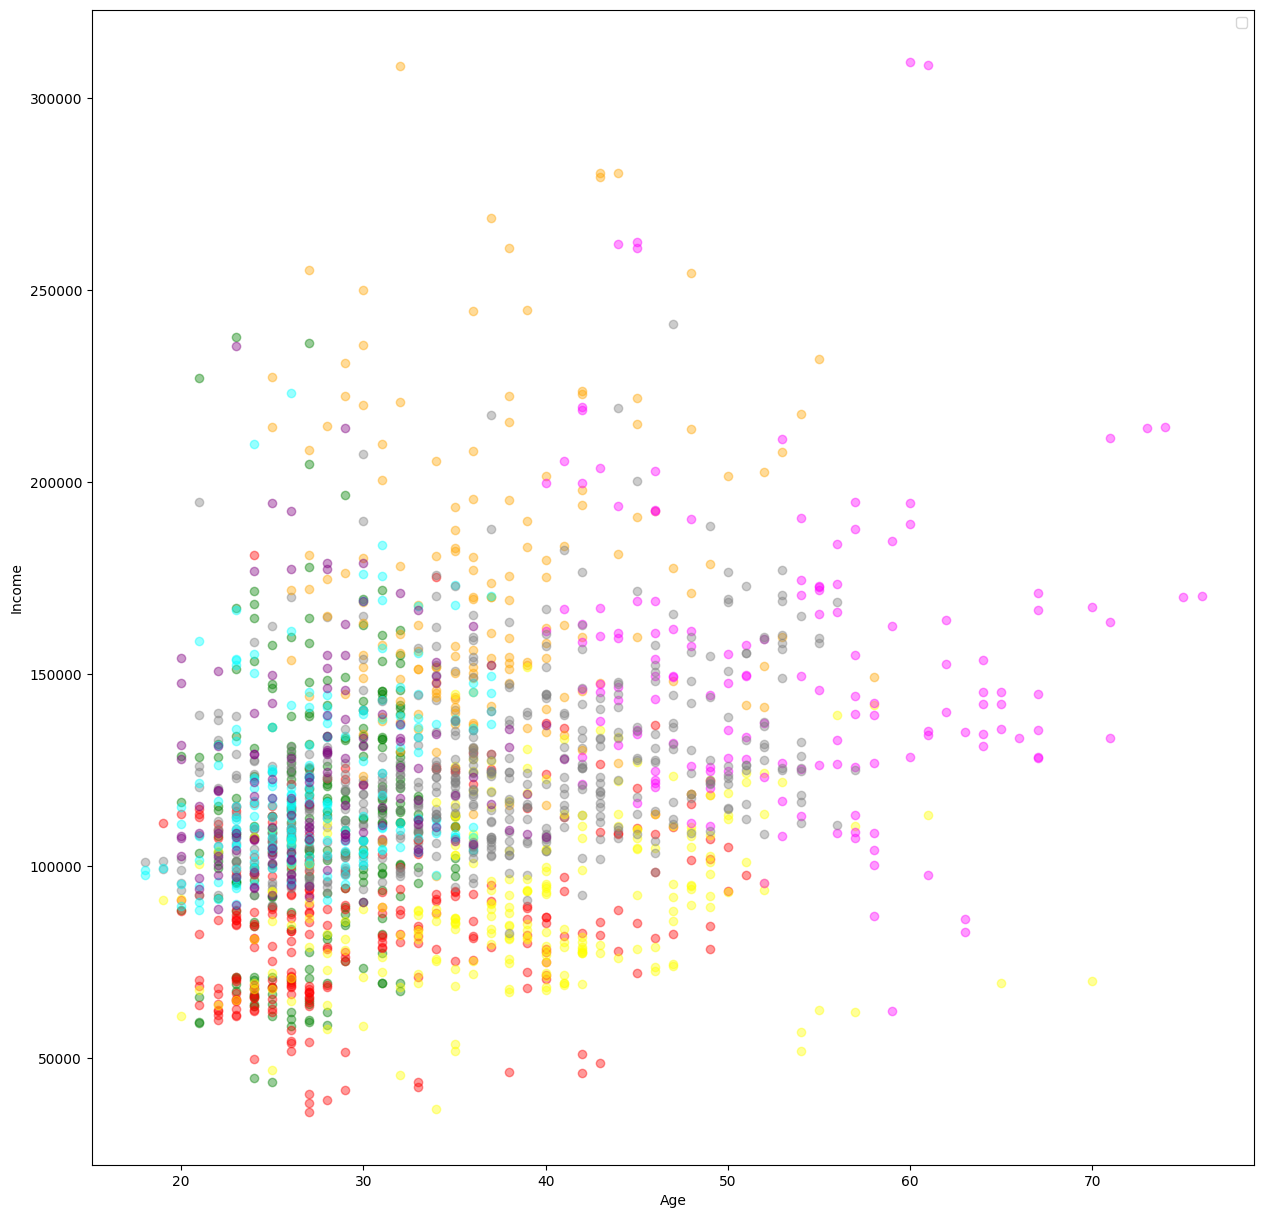

In [20]:
#Visualization
import warnings
warnings.filterwarnings('ignore')

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)


# kmeans_modelim.cluster_centers_ numpy Since it is a 2-dimensional array, use x and y columns as kmeans_modelim.cluster_centers_[:,0] 
We get # and kmeans_modelim.cluster_centers_[:,1] for the scatter plot:
#plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()
#We grouped with 10 clusters